# Week 4 - Counting Words & Phrases

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

The dataset here includes 3864 students' posts on a MOOC Course Discussion Forum called "“Introduction to Psychology as a Science" offered by GIT and CMU in 2013. I would like to see how often students refer to the course material in their discussion post.

In [2]:
with open('../week-4/posts.txt') as f:
    posts = f.read()
posts[1:1000]

'Hi!<br />My name is Julia\t I am from Spain and I will begin my biochemistry doctoral studies on August in New York! This is my second course from Coursera and I am really excited! I am absolutely interested in Neuroscience and Psychology<br /> "\n"The Quiz is still open. Once it closes tomorrow\t answers or their locations may be given in the forum. You may wait for a day.<br /> "\n"This assignment was like bowling with a curtain in front of the pins. You roll the ball and hear pins falling down. Someone says\t Okay\t you\'ve only got two pins left!"" And as you get ready to knock down those two pins\t you realize that you don\'t know if they are together in the same location or split\t with one on each side. So you ask\t ""Where are those two pins?"" And the reply is\t ""Sorry\t I can\'t tell you. Just knock down those two pins."" "\n"I cannot find a link to input my written assignment. I\'m done\t just need to find how to post it??? "\n"My ""theory"" is that it\'s just a technical 

In [3]:
posts = posts.replace("<br />", '')
posts = posts.replace("\n", '')
posts = posts.replace('"', '')
posts = posts.replace('\t', '')
posts = posts.replace('>', '')
posts = posts.replace('<', '')
posts = posts.replace('nbsp', '')
posts = posts.replace('&', '')
posts[1:1000]

"i!My name is Julia I am from Spain and I will begin my biochemistry doctoral studies on August in New York! This is my second course from Coursera and I am really excited! I am absolutely interested in Neuroscience and Psychology The Quiz is still open. Once it closes tomorrow answers or their locations may be given in the forum. You may wait for a day. This assignment was like bowling with a curtain in front of the pins. You roll the ball and hear pins falling down. Someone says Okay you've only got two pins left! And as you get ready to knock down those two pins you realize that you don't know if they are together in the same location or split with one on each side. So you ask Where are those two pins? And the reply is Sorry I can't tell you. Just knock down those two pins. I cannot find a link to input my written assignment. I'm done just need to find how to post it??? My theory is that it's just a technical problem....It made me get a; 9 ;instead of a 10 :( Oh and ChristineYou wer

In [4]:
posts_clean = posts.rsplit('. ')
len(posts_clean)

9136

In [5]:
nlp = spacy.load("en")

In [6]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [7]:
word_tokenize(posts[0:99999])

['Hi!My',
 'name',
 'is',
 'Julia',
 'I',
 'am',
 'from',
 'Spain',
 'and',
 'I',
 'will',
 'begin',
 'my',
 'biochemistry',
 'doctoral',
 'studies',
 'on',
 'August',
 'in',
 'New',
 'York',
 'This',
 'is',
 'my',
 'second',
 'course',
 'from',
 'Coursera',
 'and',
 'I',
 'am',
 'really',
 'excited',
 'I',
 'am',
 'absolutely',
 'interested',
 'in',
 'Neuroscience',
 'and',
 'Psychology',
 'The',
 'Quiz',
 'is',
 'still',
 'open',
 'Once',
 'it',
 'closes',
 'tomorrow',
 'answers',
 'or',
 'their',
 'locations',
 'may',
 'be',
 'given',
 'in',
 'the',
 'forum',
 'You',
 'may',
 'wait',
 'for',
 'a',
 'day',
 'This',
 'assignment',
 'was',
 'like',
 'bowling',
 'with',
 'a',
 'curtain',
 'in',
 'front',
 'of',
 'the',
 'pins',
 'You',
 'roll',
 'the',
 'ball',
 'and',
 'hear',
 'pins',
 'falling',
 'down',
 'Someone',
 'says',
 'Okay',
 'you',
 "'ve",
 'only',
 'got',
 'two',
 'pins',
 'left',
 'And',
 'as',
 'you',
 'get',
 'ready',
 'to',
 'knock',
 'down',
 'those',
 'two',
 'pins',

You can see how the sentence is broken into its constituent words. We can then do some analysis with this. 

# Counting words

In [8]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [9]:
countedWords = wordCounter(word_tokenize(posts[0:99999]))
countedWords[:10]

,word,count
0,hi!my,1
1,name,7
2,is,216
3,julia,1
4,i,457
5,am,57
6,from,59
7,spain,2
8,and,256
9,will,75


Lets sort and plot our counts to investigate the shape of our word frequency distribution.

First we need to sort the words by count.

In [10]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:20]

,word,count
30,the,694
4,i,457
76,to,360
8,and,256
58,of,252
49,a,243
17,in,224
2,is,216
35,it,216
46,you,178


Punctuation and very common words (articles 'a' and 'the'; prepositions 'of' and 'to') make up the most common values, but this isn't very interesting and can actually get in the way of our analysis. We may remove these 'function words' by removing according to a stopword list, setting some frequency threshold, or using a weighting scheme (like tf.idf) to decrease their influence - we will look at these methods in more detail as we go through this tutorial.

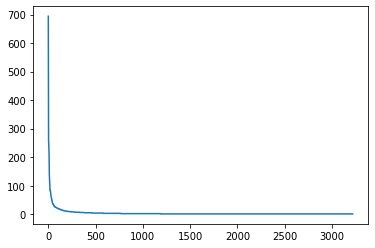

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

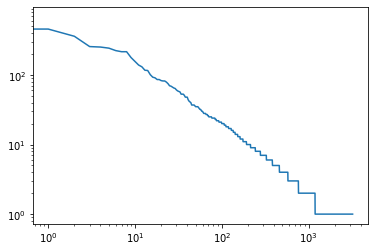

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [13]:
whTokens = word_tokenize(posts[0:99999])

Convert the Tokens into a Text

In [14]:
import nltk

In [15]:
whText = nltk.Text(whTokens)

MOOCIndex = nltk.text.ConcordanceIndex(whText) 
MOOCIndex.print_concordance('psychology')

Displaying 20 of 20 matches:
onships I was always interested in psychology but I have never studied it so I h
 course becouse I 'm interested in psychology and I would like to improve my eng
al if you are really interested in psychology the best course in coursera in my 
cal disorders i is termed abnormal psychology About 1 in every 4 Americans or ov
 is a lot of reading however it is psychology so there is a lot of reading in it
lop further understanding of human psychology and the mind Thanks Alex Prof Smit
Peru I 'm an English teacher and a psychology student I want to learn psychology
psychology student I want to learn psychology through a different aproach and ge
o widen my conceptual knowledge in psychology Thanks for reminding me about Modu
e!/p piOne of the big questions in psychology is nature versus nurture Discuss t
meet all of you I 'm interested in psychology of relationships if I 'm not mista
 mistaken this is a part of social psychology especially those of men and women 

First attempt of finding Collocation. We can pick a word (or words) and find what words tend to occur around it.

In [16]:
whText.common_contexts(['learn'])

will_something to_n to_more to_their last_by to_psychology to_how
to_and to_it to_a


We can also just count the number of times the word occurs.

In [17]:
whText.count('theory')

4

We can also plot each time a set of words occurs.

/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecate

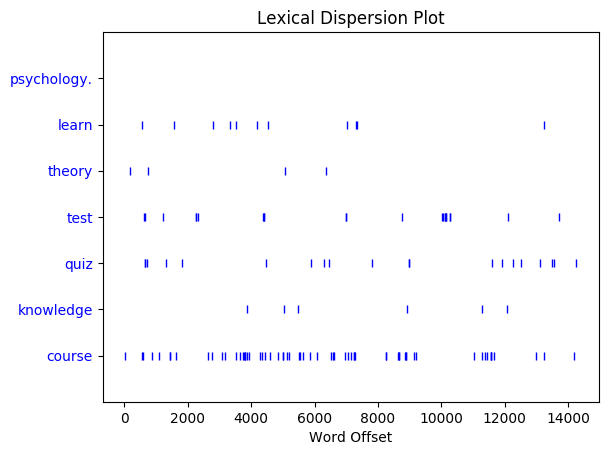

In [18]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['psychology.','learn', 'theory', 'test' ,'quiz', 'knowledge', 'course'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

# Filtering and Normalizing Text

In [256]:
MOOC = pandas.read_csv('../week-4/allpostcomment_coded.csv', index_col=0)
MOOC[:8]

,post number,comment,post,code,thread starter,previous post
participationid,,,,,,
1,1,0,"Hi!<br />My name is Julia, I am from Spain and...",O,My name is NAME509825 NAME509825. I'm 17 and w...,Hello My name is NAME1017864 I am From Utah. G...
2,1,0,The Quiz is still open. Once it closes tomorro...,A2,I did not give the correct answer for these tw...,I did not give the correct answer for these tw...
3,1,0,This assignment was like bowling with a curtai...,A2,My experience with this course so far has been...,"In my humble opiniÃ³n ""the data would be analy..."
4,1,0,I cannot find a link to input my written assig...,A2,"Hi, I did not understand how assignments works...","Hi, I did not understand how assignments works..."
5,1,0,"My ""theory"" is that it's just a technical prob...",A2,the grader marked question 9's right answer of...,I experienced the same thing - can ysomebody c...
6,1,0,"Oh, and Christine,<br /><br />You were right t...",O,I've done several Coursera classes and I'm int...,"Christine and Eric,<br /><br />You two, and on..."
7,1,0,"I am not involved in any age gap relationship,...",A2,According to the info in OIL; younger couples ...,It will end up in cheating by 20 on 40.<br />J...
8,1,0,Will the final exam be timed? <br />,A2,Hello !<br />I wonder what means:&nbsp;<span>F...,Great cause I saw it and was wondering<br /><b...


In [20]:
MOOC['tokenized_text'] = MOOC['post'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [21]:
MOOC['word_counts'] = MOOC['tokenized_text'].apply(lambda x: len(x))
MOOC['word_counts']

participationid
1        45
2        26
3        89
4        22
5        22
       ... 
3860     57
3861     95
3862     18
3863     21
3864    133
Name: word_counts, Length: 3864, dtype: int64

In [22]:
countsDict = {}
for word in MOOC['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:200]

[('the', 10693),
 ('I', 6855),
 ('to', 6191),
 ('>', 4925),
 ('and', 4829),
 ('of', 4432),
 ('a', 4245),
 ('is', 3460),
 ('<', 3246),
 ('in', 3124),
 ('that', 3026),
 ('you', 2971),
 ('it', 2615),
 ('for', 2227),
 ('/><br', 1976),
 ('be', 1874),
 ('not', 1821),
 ('have', 1802),
 ('this', 1710),
 ('are', 1463),
 ('on', 1422),
 ('my', 1342),
 ('with', 1342),
 ('br', 1238),
 ('as', 1214),
 ('do', 1203),
 ('was', 1156),
 ("n't", 1126),
 ('but', 1073),
 ('or', 1003),
 ("'s", 1000),
 ('course', 996),
 ('your', 975),
 ('can', 968),
 ('we', 930),
 ('will', 891),
 ('so', 841),
 ('from', 816),
 ('if', 809),
 ('would', 796),
 ('about', 796),
 ('all', 780),
 ('am', 774),
 ('an', 773),
 ('they', 751),
 ('what', 727),
 ('me', 695),
 ('one', 677),
 ('by', 655),
 ('at', 652),
 ('The', 623),
 ('there', 610),
 ('just', 601),
 ('more', 594),
 ('think', 572),
 ('did', 567),
 ("'m", 550),
 ('some', 537),
 ('people', 521),
 ('like', 515),
 ('know', 491),
 ('how', 483),
 ('It', 478),
 ('very', 469),
 ('shoul

We can look at this and pick the cutoff, usually it is at the first noun. So we will cut all words before `'course'`.

In [23]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'course':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq.append('<br />')
stop_words_freq.append('<br')
stop_words_freq.append('hi!<br')
stop_words_freq.append('/>my')
stop_words_freq.append('/>it')
stop_words_freq.append('nbsp')
stop_words_freq.append('a&nbsp')
stop_words_freq.append('&nbsp')
stop_words_freq.append('nbsp;instead')
stop_words_freq.append('nbsp;')
stop_words_freq.append('/>&nbsp;<br, />&nbsp;&nbsp')
stop_words_freq.append('div')
stop_words_freq.append('/>i')
stop_words_freq.append('/>3')
stop_words_freq.append('%')
stop_words_freq

['the',
 'I',
 'to',
 '>',
 'and',
 'of',
 'a',
 'is',
 '<',
 'in',
 'that',
 'you',
 'it',
 'for',
 '/><br',
 'be',
 'not',
 'have',
 'this',
 'are',
 'on',
 'my',
 'with',
 'br',
 'as',
 'do',
 'was',
 "n't",
 'but',
 'or',
 "'s",
 '<br />',
 '<br',
 'hi!<br',
 '/>my',
 '/>it',
 'nbsp',
 'a&nbsp',
 '&nbsp',
 'nbsp;instead',
 'nbsp;',
 '/>&nbsp;<br, />&nbsp;&nbsp',
 'div',
 '/>i',
 '/>3',
 '%']

In [98]:
MOOC['post'] = MOOC['post'].str.replace("<br />", '').replace("\n", '').replace('"', '').replace('\t', '').replace('>', '').replace('<', '').replace('nbsp', '').replace('&', '').replace('%', '').replace('name2379412', '').replace("https://", '')
MOOC['post'].head(10)

participationid
1     Hi!My name is Julia, I am from Spain and I wil...
2     The Quiz is still open. Once it closes tomorro...
3     This assignment was like bowling with a curtai...
4     I cannot find a link to input my written assig...
5     My "theory" is that it's just a technical prob...
6     Oh, and Christine,You were right that a whole ...
7     I am not involved in any age gap relationship,...
8                       Will the final exam be timed?  
9     I guess we already had too many tests and surv...
10    Got 21. Thanks to those who assessed my work, ...
Name: post, dtype: object

Normalize the token

In [99]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [100]:
MOOC['normalized_tokens'] = MOOC['post'].apply(lambda x: normalizeTokens(x, extra_stop=stop_words_freq))

In [101]:

MOOC['normalized_tokens_count'] = MOOC['normalized_tokens'].apply(lambda x: len(x))

MOOC

,post number,comment,post,code,thread starter,previous post,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
participationid,,,,,,,,,,,
1,1,0,"Hi!My name is Julia, I am from Spain and I wil...",O,My name is NAME509825 NAME509825. I'm 17 and w...,Hello My name is NAME1017864 I am From Utah. G...,"[Hi!<br, />My, name, is, Julia, I, am, from, S...",45,"[hi!my, julia, spain, begin, biochemistry, doc...",18,"[(hi!my, NNP), (name, NN), (is, VBZ), (julia, ..."
2,1,0,The Quiz is still open. Once it closes tomorro...,A2,I did not give the correct answer for these tw...,I did not give the correct answer for these tw...,"[The, Quiz, is, still, open, Once, it, closes,...",26,"[quiz, open, close, tomorrow, answer, location...",10,"[(the, DT), (quiz, NN), (is, VBZ), (still, RB)..."
3,1,0,This assignment was like bowling with a curtai...,A2,My experience with this course so far has been...,"In my humble opiniÃ³n ""the data would be analy...","[This, assignment, was, like, bowling, with, a...",89,"[assignment, like, bowl, curtain, pin, roll, b...",29,"[(this, DT), (assignment, NN), (was, VBD), (li..."
4,1,0,I cannot find a link to input my written assig...,A2,"Hi, I did not understand how assignments works...","Hi, I did not understand how assignments works...","[I, can, not, find, a, link, to, input, my, wr...",22,"[find, link, input, write, assignment, need, f...",8,"[(i, PRP), (can, MD), (not, RB), (find, VB), (..."
5,1,0,"My ""theory"" is that it's just a technical prob...",A2,the grader marked question 9's right answer of...,I experienced the same thing - can ysomebody c...,"[My, theory, is, that, it, 's, just, a, techni...",22,"[theory, technical, problem]",3,"[(my, PRP$), ("", ``), (theory, NN), ("", ''), (..."
...,...,...,...,...,...,...,...,...,...,...,...
3860,0,1,"EMAIL25707 My assignment is complete and I, li...",A1,I received a 19. It appears that I was scored ...,Do I detect a bit of an attitude? Probably not...,"[EMAIL25707, My, assignment, is, complete, and...",57,"[email25707, assignment, complete, like, stude...",28,"[(email25707, NNP), (my, PRP$), (assignment, N..."
3861,0,1,"Fernanda, The idea of a pre-test is to take it...",A2,Hey!&nbsp;I would like to know about the Psych...,I actually had fun answering this Pre-test yes...,"[Fernanda, The, idea, of, a, pre, test, is, to...",95,"[fernanda, idea, pre, test, find, know, point,...",29,"[(fernanda, NNP), (,, ,), (the, DT), (idea, NN..."
3862,0,1,That's not the reason why I deleted my posts ;...,O,"""In addition peer assessment puts people with ...","I did not ""despise"" your other comments based ...","[That, 's, not, the, reason, why, I, deleted, ...",18,"[reason, delete, post, google]",4,"[(that, DT), ('s, VBZ), (not, RB), (the, DT), ..."


Now that it is cleaned we start analyzing the dataset. We can start by finding frequency distributions for the dataset. The ConditionalFreqDist class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results. 

In [102]:
#.sum() adds together the lists from each row into a single list
sample = MOOC['normalized_tokens']
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in MOOC['normalized_tokens'][1:30].sum()))

#print the number of words
print(whcfdist.N())

544


From this we can lookup the distributions of different word lengths

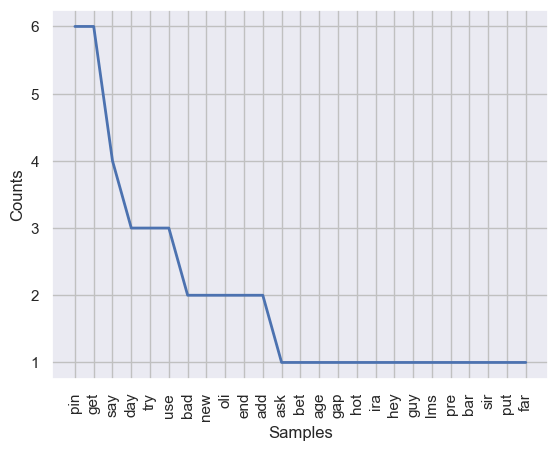

In [103]:
whcfdist[3].plot()

We can also create a Conditional Probability Distribution or [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) from the `ConditionalFreqDist`. To do this, however, we need a model for the probability distribution. A simple model is [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. 

In [104]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(whcpdist[2].max())

#And its probability
print(whcpdist[2].prob(whcpdist[2].max()))

hi
0.25


Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). 

The method below works similarly to ```nltk.pos_text```, and can work with the conditional frequency distributions it provides.

In [105]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [106]:
MOOC['normalized_tokens_POS'] = [spacy_pos(t) for t in MOOC['post']]

This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the `nltk.ConditionalFreqDist()` function wants them. We can now construct another conditional frequency distribution.

The frequency of each part of speech for each word.

In [107]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in MOOC['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives. The OLI is a particular word that describe the interactive feature of the online course.

In [108]:
whcfdist_POStoWord['JJ']

FreqDist({'other': 432, 'good': 376, 'final': 333, 'same': 314, 'first': 310, 'many': 304, 'different': 191, 'great': 186, 'oli': 172, 'right': 156, ...})

Or look at the most common nouns

In [109]:
whcfdist_POStoWord['NN'].most_common(5)

[('course', 1021),
 ('assignment', 508),
 ('time', 455),
 ('%', 448),
 ('psychology', 396)]

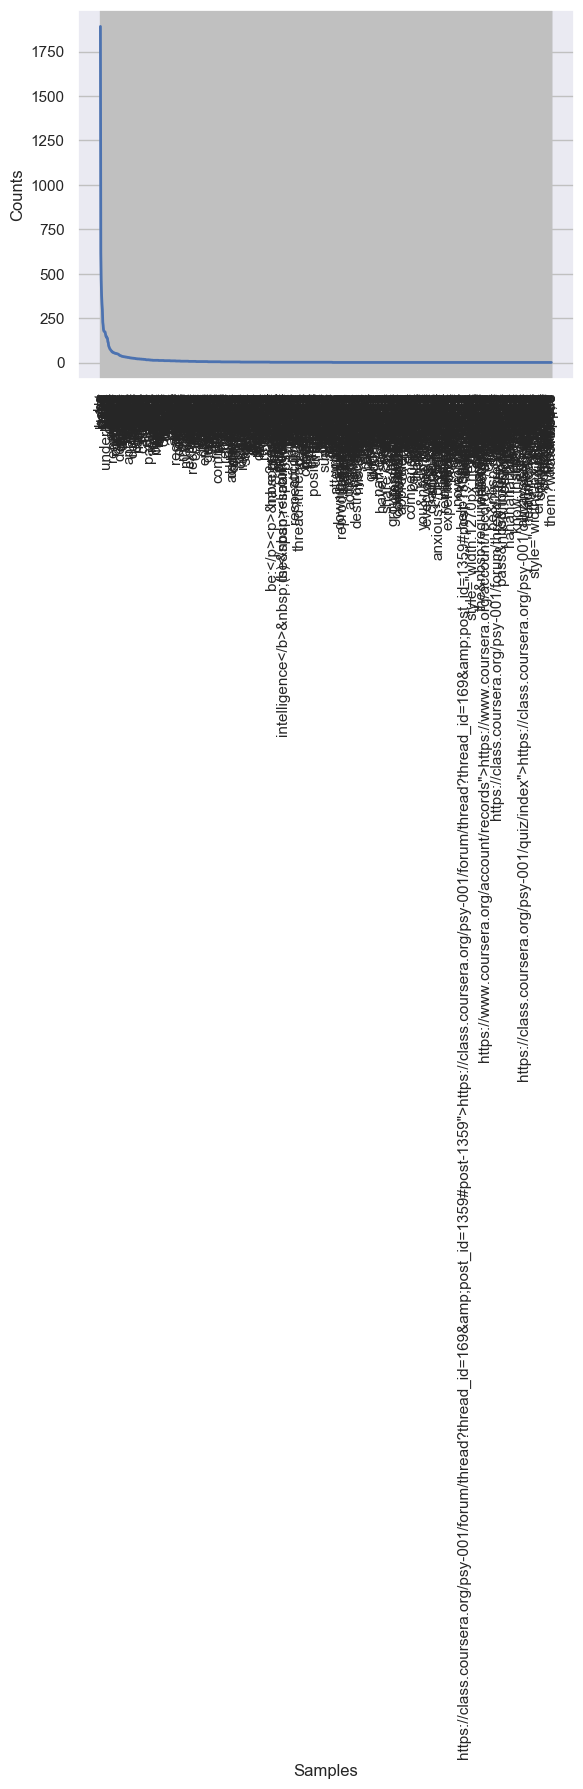

In [110]:
whcfdist_POStoWord['VB'].plot()

The above is not a proper plot as many of the https:// links are count as VB. We can then do a similar analysis of the word probabilities

In [112]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

course
0.02833721704394141


We can even create a...wait for it...WORD CLOUD or Wordl to gaze at and draw mystical, approximate inferences about important nouns and verbs in our corpus:

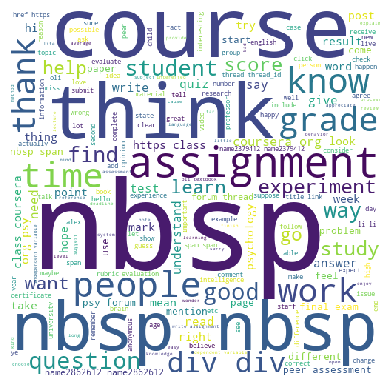

In [113]:
wc = wordcloud.WordCloud(background_color="white", max_words=200, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(MOOC['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("MOOC_word_cloud.pdf", format = 'pdf')

The nbsp is very hard to clean because it often goes along with other symbols. We have tried to clean some "nbsp" but there are clearly some remain in the dataset. However, we could still see "course", "think", "assignment" are frequently appear in discussion posts. This is good since it indicates students are using discussion forum as a learning place not just a casually talking place. 

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In POS tagging, we classify each word by its semantic role in a sentence.

In [116]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [117]:
MOOC['sentences'] = MOOC['post'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [118]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [119]:
MOOC['POS_sents'] = MOOC['sentences'].apply(lambda x: tag_sents_pos(x))

In [120]:
MOOC['POS_sents'] #This part doesn't work

participationid
1       [[(Hi!My, CD), (name, NN), (is, VBZ), (Julia, ...
2       [[(The, DT), (Quiz, NNP), (is, VBZ), (still, R...
3       [[(This, DT), (assignment, NN), (was, VBD), (l...
4       [[(I, PRP), (can, MD), (not, RB), (find, VB), ...
5       [[(My, PRP$), (theory, NN), (is, VBZ), (that, ...
                              ...                        
3860    [[(EMAIL25707, ADD)], [(My, PRP$), (assignment...
3861    [[(Fernanda, NNP)], [(The, DT), (idea, NN), (o...
3862    [[(That, DT), ('s, VBZ), (not, RB), (the, DT),...
3863    [[(You, PRP), (have, VBP), (done, VBN), (it, P...
3864    [[(A, DT), (person, NN), (who, WP), (is, VBZ),...
Name: POS_sents, Length: 3864, dtype: object

In [121]:
countTarget = 'NN'
targetCounts = {}
for entry in MOOC['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('course', 987),
 ('assignment', 465),
 ('m', 464),
 ('time', 463),
 ('nbsp', 459),
 ('experiment', 373),
 ('p', 340),
 ('way', 322),
 ('grade', 316),
 ('peer', 274),
 ('question', 272),
 ('psychology', 264),
 ('week', 259),
 ('score', 250),
 ('quiz', 231),
 ('something', 224),
 ('work', 219),
 ('problem', 207),
 ('student', 205),
 ('exam', 201)]

What about the adjectives that modify the word, "course"?

In [122]:
NTarget = 'JJ'
Word = 'course'
NResults = set()
for entry in MOOC['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)   

{'due', 'fellow&nbsp;happy', 'traditional', 'other', 'structured', 'fellow', 'online', 'strict', 'advanced', 'open', 'similar', 'such', 'wonderful', 'main', 'interesting', 'Dear', 'entire', 'select', 'bad', 'great', 'informative', 'good', 'French', 'new', 'first', 'enjoyable', 'true', 'excellent', 'same', 'overall', 'ongoing', 'weekly', 'second', 'total', 'last', 'demanding', 'Great', 'awesome', 'introductory', 'special', 'particular', 'additional', 'fine', 'Nice', 'whole', 'next', 'long', 'free', 'terrific', 'amazing', 'current'}


From the above distributions, we can have couples of insights. First, some of the most frequent nouns reflect what students most likely to talk about on the discussion forum such as "courses", "assignments", "psychology", "score", "quiz", etc. Also, by looking at the conditional association of the word "course", we see that most of the student has a positive or neutral experience with this course as some of the adjectives are "structured", "advanced", "wonderful", "interesting". However, we do see one negative word "bad".

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

# Collocation

As illustrated above, we might want to find significant bigrams (two-word phrases), trigrams (three-word phrases), n-grams (n-word phrases) or skip-grams (noncontinguous 'phrases' with skip-length n).

We will begin with the nltk.collocations.BigramCollocationFinder class, which can be given raw lists of strings with the from_words() method. By default it only looks at continuous bigrams but there is an option (window_size) to allow skip-grams.

In [123]:
MOOCBigrams = nltk.collocations.BigramCollocationFinder.from_words(MOOC['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(MOOCBigrams.N))

There are 105501 bigrams in the finder


To compare the bigrams we need to tell nltk what our score function is. Initially, we will look at the raw counts.

In [124]:
def bigramScoring(count, wordsTuple, total):
    return count

print(MOOCBigrams.nbest(bigramScoring, 10))

[('peer', 'assessment'), ('final', 'exam'), ('name2862612', 'name2862612'), ('psy-001', 'forum'), ('/p', 'p'), ('href="https://class.coursera.org', 'psy-001'), ('oli', 'textbook'), ('™', 's'), ('write', 'assignment'), ('dependent', 'variable')]


In [125]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

MOOCBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  1, The second word is: 3
The first word is:  3, The second word is: 16
The first word is:  16, The second word is: 34
The first word is:  34, The second word is: 2
The first word is:  2, The second word is: 1
The first word is:  1, The second word is: 388
The first word is:  388, The second word is: 3
The first word is:  3, The second word is: 152
The first word is:  152, The second word is: 12
The first word is:  12, The second word is: 166


Two words can appear together by chance. Recall from Manning and Schütze's textbook that a t-value can be computed for each bigram to see how significant the association is. You may also want to try computing the  𝜒2 , likelihood ratio, and pointwise mutual information statistics.

In [126]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
MOOCBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('peer', 'assessment'), 1739.4155978202316),
 (('final', 'exam'), 1704.6498748514161),
 (('psy-001', 'forum'), 1364.2319356901528),
 (('name2862612', 'name2862612'), 1356.8979353821476),
 (('href="https://class.coursera.org', 'psy-001'), 1341.3133604252648),
 (('/p', 'p'), 985.9556086045808),
 (('™', 's'), 927.2300928159668),
 (('name2862612bname2862612rname2862612', 'name2862612'), 907.9361804014054),
 (('dependent', 'variable'), 778.2702348082136),
 (('oli', 'textbook'), 773.7906808388185),
 (('signature', 'track'), 668.0045020890366),
 (('independent', 'variable'), 660.3162420724623),
 (('name2379412', 'name2379412'), 659.860201194362),
 (('name2379412bname2379412rname2379412', 'name2379412'), 644.814864659126),
 (('look', 'forward'), 540.0520028842643),
 (('good', 'luck'), 503.58599839493644),
 (('™', 't'), 487.6380816083548),
 (('target=', 'title="link'), 457.101377522734),
 (('year', 'old'), 447.9434743855869),
 (('statement', 'accomplishment'), 444.5547202756675),
 (('+', '+')

There are a few other available measures

We can also look at trigrams

In [127]:
#This part is completely mess up. Don't include it in the presentation.
trigram_measures = nltk.collocations.TrigramAssocMeasures()
MOOCTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(MOOC['normalized_tokens'].sum())
MOOCTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('name2862612bname2862612rname2862612', 'name2862612', 'name2862612'),
  8.426115427250433),
 (('href="https://class.coursera.org', 'psy-001', 'forum'), 8.366552742742993),
 (('name2862612', 'name2862612', 'name2862612'), 6.999875969750308),
 (('name2379412bname2379412rname2379412', 'name2379412', 'name2379412'),
  6.855643374962575),
 (('name2862612', 'name2862612bname2862612rname2862612', 'name2862612'),
  6.244951656683633),
 (('name2862612', 'name2862612', 'name2862612bname2862612rname2862612'),
  5.744512267782715),
 (('question', 'final', 'exam'), 5.290749704277357),
 (('psy-001', 'human_grading', 'view'), 5.196144713091504),
 (('view', 'course', 'zipcode8'), 5.196100569774229),
 (('human_grading', 'view', 'course'), 5.196094808337296),
 (('nature', 'versus', 'nurture'), 5.099014041069194),
 (('+', '+', '+'), 4.999993568801868),
 (('target="_blank', 'href="https://class.coursera.org', 'psy-001'),
  4.9999837958194195),
 (('course', 'zipcode8', 'assessments/8'), 4.89896465455327

The trigram doesn't tell much about collocation in our case because we have some student number and web link in the data. However, there is one interesting observation here which is nature versus nurture. We may want to look more closely at this phrase later. 

Or n-grams (for any number n)

In [129]:
Ngrams = nltk.ngrams(MOOC['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('grade', 'mention', 'word', 'independent'): 2, ('mention', 'word', 'independent', 'dependent'): 2, ('word', 'independent', 'dependent', 'variable'): 2, ('independent', 'dependent', 'variable', 'define'): 2, ('system', 'said:&nbsp;<table><tbody><tr></tr></tbody></table><table><tbody><tr></tr></tbody></table', 'hard', 'deadline:&nbsp;<b'): 2, ('said:&nbsp;<table><tbody><tr></tr></tbody></table><table><tbody><tr></tr></tbody></table', 'hard', 'deadline:&nbsp;<b', 'mon'): 2, ('hard', 'deadline:&nbsp;<b', 'mon', 'jun'): 2, ('deadline:&nbsp;<b', 'mon', 'jun', '2:30'): 2, ('mon', 'jun', '2:30', 'ist'): 7, ('jun', '2:30', 'ist', 'utc'): 7, ('2:30', 'ist', 'utc', '+0530)</b>.&nbsp;if'): 3, ('ist', 'utc', '+0530)</b>.&nbsp;if', 'submit'): 3, ('utc', '+0530)</b>.&nbsp;if', 'submit', 'time&nbsp;<b'): 2, ('+0530)</b>.&nbsp;if', 'submit', 'time&nbsp;<b', 'after</b>&nbsp;the'): 2, ('submit', 'time&nbsp;<b', 'after</b>&nbsp;the', 'hard'): 2, ('time&nbsp;<b', 'after</b>&nbsp;the', 'hard', 'deadline')

There are couples of interesting cases here for n-gram. For example, ('old', 'lose', 'interest', 'sex). We will look into this later. 

In [146]:
wh_bigrams = nltk.bigrams(whText)
wh_cfd_bi = nltk.ConditionalFreqDist(wh_bigrams)
wh_cfd_bi.conditions()

['Hi!My',
 'name',
 'is',
 'Julia',
 'I',
 'am',
 'from',
 'Spain',
 'and',
 'will',
 'begin',
 'my',
 'biochemistry',
 'doctoral',
 'studies',
 'on',
 'August',
 'in',
 'New',
 'York',
 'This',
 'second',
 'course',
 'Coursera',
 'really',
 'excited',
 'absolutely',
 'interested',
 'Neuroscience',
 'Psychology',
 'The',
 'Quiz',
 'still',
 'open',
 'Once',
 'it',
 'closes',
 'tomorrow',
 'answers',
 'or',
 'their',
 'locations',
 'may',
 'be',
 'given',
 'the',
 'forum',
 'You',
 'wait',
 'for',
 'a',
 'day',
 'assignment',
 'was',
 'like',
 'bowling',
 'with',
 'curtain',
 'front',
 'of',
 'pins',
 'roll',
 'ball',
 'hear',
 'falling',
 'down',
 'Someone',
 'says',
 'Okay',
 'you',
 "'ve",
 'only',
 'got',
 'two',
 'left',
 'And',
 'as',
 'get',
 'ready',
 'to',
 'knock',
 'those',
 'realize',
 'that',
 'do',
 "n't",
 'know',
 'if',
 'they',
 'are',
 'together',
 'same',
 'location',
 'split',
 'one',
 'each',
 'side',
 'So',
 'ask',
 'Where',
 'reply',
 'Sorry',
 'ca',
 'tell',
 'Ju

We want to see whether "peer assessment" is a collocation. We can check this by looking at the conditional frequency of the word "peer". 

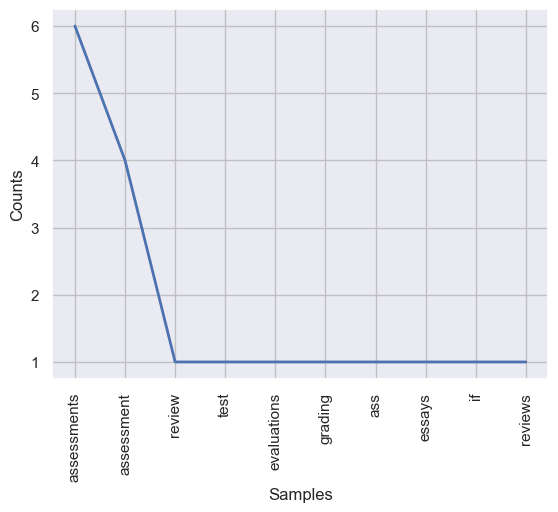

In [147]:
wh_cfd_bi['peer'].plot()

As you can see, peer most often associated with assessment in our dataset. Peer Assessment is one of the task of our particular MOOC course. It could be considered as a collocation in our case. 

Now we want to check whether "nature versus nurture" is a collocation. 

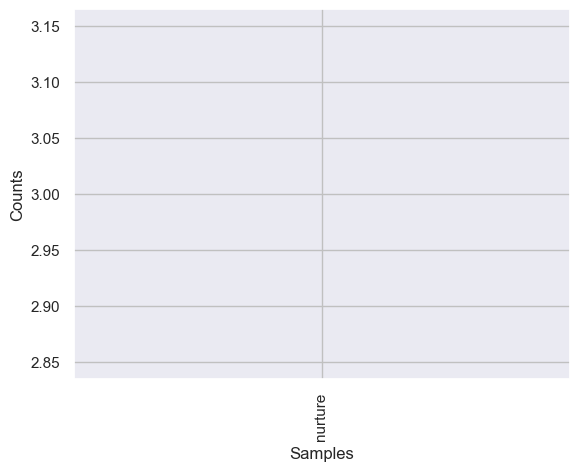

In [153]:
wh_Trigrams_new = nltk.trigrams(whText)
wh_Trigrams_pairs_new = (((w0, w1), w2) for w0, w1, w2 in wh_Trigrams_new)
wh_cfd_Tri_new = nltk.ConditionalFreqDist(wh_Trigrams_pairs_new)
wh_cfd_Tri_new[('nature', 'versus')].plot()

As this is the only trigram in our dataset, it is hard to tell whether it is a collocation just looking at the frequency plot. 

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

# Name Entity Recognition

Named Entity Recognition (NER) is also a classification task, which identifies named objects. 
Like every other part of the pipeline, spaCy also tags words with their tagged entity (https://spacy.io/api/entityrecognizer). You can see the full capacity of what spaCy does by checking out: https://spacy.io/usage/linguistic-features.

For training the identification of such entities, spaCy uses a deep learning model.

In [157]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [158]:
MOOC['classified_sents'] = MOOC['sentences'].apply(lambda x: tag_sents_ner(x))

In [159]:
MOOC['classified_sents']

participationid
1       [[(Julia, PERSON)], [(Spain, GPE)], [(August, ...
2       [[(Quiz, ORG), (tomorrow, DATE)], [(a day, DAT...
3       [[], [(Someone, ORG)], [], [(two, CARDINAL)], ...
4                                                [[], []]
5          [[(9 nbsp;instead, CARDINAL), (10, CARDINAL)]]
                              ...                        
3860    [[(EMAIL25707, PERSON)], [], [], [], [(17, CAR...
3861    [[(Fernanda, ORG)], [], [], [(second, ORDINAL)...
3862                                             [[], []]
3863                                             [[], []]
3864                                         [[], [], []]
Name: classified_sents, Length: 3864, dtype: object

In [160]:
entityCounts = {}
for entry in MOOC['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('first', 310),
 ('OLI', 301),
 ('one', 264),
 ('two', 183),
 ('Coursera', 162),
 ('Alex', 145),
 ('2', 141),
 ('second', 131),
 ('3', 129),
 ('10', 119)]

One of the most occuring word is "OLI". This is the interactive feature of our Coursera Course. This is special for our dataset. 

We could also list the most common "non-objects". (We note that we're not graphing these because there are so few here.)

In [163]:
nonObjCounts = {}
for entry in MOOC['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('first', 310),
 ('one', 264),
 ('two', 183),
 ('2', 141),
 ('second', 131),
 ('3', 129),
 ('Alex', 123),
 ('10', 119),
 ('Smith', 95),
 ('English', 92)]

What about the Organizations?

In [164]:
OrgCounts = {}
for entry in MOOC['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

Coursera
Neuroscience
Quiz
Someone
Phineas Gage Intellect
Barcelona
MENTIONS
donÂ´t
OLI
Four Brains Bodies
Behaviour
Coursera
OLI
anyway!&nbsp
coursera
BY FAR
OLI
Chesar Broadcasting PTY Ltd
the Australian Broadcasting Corporation
OLI
worldwide"1
more&nbsp;on
Sexual Transmitted Diseases.</p><p>&nbsp;</p><p >
IQ.</p><p>&nbsp;</p><p>&nbsp;</p><p
IQ.</p
cute&nbsp;Santa&nbsp;Claus
Coursera
OLI
OLI
Quizzes
schizophrenia:<a
Coursera
OLI
GeorgiaTech
Violence
completion</b></p
Coursera
Fingers
OLI
coursera
Alex
the DSM Axes
OLI
Axis
OLI
Coursera
UniShared
src="https://coursera
evaluation.</div >
6th Property
thread?thread_id=1343#comment-2371</a></p><p><strong
SPECIFICALLY
NAME2862612 NAME2862612 >
NAME2862612&NAME2862612nNAME2862612bNAME2862612sNAME2862612pNAME2862612;NAME2862612FNAME2862612rNAME2862612iNAME2862612dNAME2862612aNAME2862612yNAME2862612
Institute
Coursera
quot;you
isnÂ´t
OLI
que
un
el porcentaje para
OLI
OLI
Coursera
Todos
Participem
OLI
step3
NAME2862612INAME2862612
NAME2862612

Wie
Hahaha
OLI
link:<a
Coursera
work.&nbsp One
OLI
OLI
Weekly Quizzes
Coursera
the Quiz Menu
Grade
Clinical Psychology
Health Psychology Human Resources Psychology
and&nbsp;dependent&nbsp;variables
NAME2379412YNAME2379412eNAME2379412sNAME2379412!NAME2379412
OLI
OLI
Shweta
help&nbsp;<p><b
Intelligence
expressed.</p><p><b>&nbsp;</b></p><p>&nbsp;â€œIntelligence
Intelligence
Creative Practical
Analytic
Book
Grand
FOLLOW
NAME2379412INAME2379412'NAME2379412mNAME2379412
LinkedIn
NAME2982155 Company
OLI
OLI
like&nbsp;<span>&nbsp;internal and&nbsp;external&nbsp;</span
Coursera
ADHD
Masatoshi
href="http://www.ifitweremyhome.com
Amrea</p
Milgram
show!&nbsp
OLI
OLI
OLI
Coursera
Coursera
Coursera
MENTIONS
Kathy&#39;s
Social Context of Mental Health
Coursera
Hola
InÃ © s
Coursera
Phoebe
Next
the Control Group Experimental Group
Variables
NAME487897est
Alex
Amy
Coursera
Controls
OLI
NEVER
Coursera
Coursera
OLI
Google
OLI
Sample Group
Asch
in&nbsp;a
Yale
Coursera
OLI
Saray Tuvieron
que estan funcionan

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [165]:
from spacy import displacy

In [205]:
doc = nlp(posts[0:5000])

In [206]:
displacy.render(doc, style='dep')

In [207]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Hi!My name name nsubj is
Julia Julia attr is
I I nsubj am
Spain Spain pobj from
I I nsubj begin
my biochemistry doctoral studies studies dobj begin
August August pobj on
New York York pobj in
my second course course attr is
Coursera Coursera pobj from
I I nsubj am
I I nsubj am
Neuroscience Neuroscience pobj in
Psychology Psychology conj Neuroscience
The Quiz Quiz nsubj is
it it nsubj closes
answers answers dobj closes
their locations locations conj answers
the forum forum pobj in
You You nsubj wait
a day day pobj for
This assignment assignment nsubj was
a curtain curtain pobj with
front front pobj in
the pins pins pobj of
You You nsubj roll
the ball ball dobj roll
pins pins dobj hear
Someone Someone nsubj says
you you nsubj got
two pins pins dobj got
you you nsubj get
those two pins pins dobj knock
you you nsubj realize
you you nsubj know
they they nsubj are
the same location location pobj in
each side side pobj on
you you nsubj ask
those two pins pins nsubj are
the reply reply nsubj i

In [208]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Hi!My compound name NOUN []
name nsubj is AUX [Hi!My]
is ROOT is AUX [name, Julia]
Julia attr is AUX []
I nsubj am AUX []
am ROOT am AUX [I, from]
from prep am AUX [Spain]
Spain pobj from ADP []
and cc begin VERB []
I nsubj begin VERB []
will aux begin VERB []
begin ROOT begin VERB [and, I, will, studies, on, in, !]
my poss studies NOUN []
biochemistry nmod studies NOUN []
doctoral amod studies NOUN []
studies dobj begin VERB [my, biochemistry, doctoral]
on prep begin VERB [August]
August pobj on ADP []
in prep begin VERB [York]
New compound York PROPN []
York pobj in ADP [New]
! punct begin VERB []
This nsubj is AUX []
is ROOT is AUX [This, course, and, am]
my poss course NOUN []
second amod course NOUN []
course attr is AUX [my, second, from]
from prep course NOUN [Coursera]
Coursera pobj from ADP []
and cc is AUX []
I nsubj am AUX []
am conj is AUX [I, excited, !]
really advmod excited ADJ []
excited acomp am AUX [really]
! punct am AUX []
I nsubj am AUX []
am ROOT am AUX [I, intere

curiosityI pobj of ADP []
think ROOT think VERB ['s, .]
it nsubj 's AUX []
's ccomp think VERB [it, important, make]
important acomp 's AUX []
to aux make VERB []
make xcomp 's AUX [to, steps]
the det steps NOUN []
right amod steps NOUN []
steps dobj make VERB [the, right]
. punct think VERB []
Will aux timed VERB []
the det exam NOUN []
final amod exam NOUN []
exam nsubjpass timed VERB [the, final]
be auxpass timed VERB []
timed ROOT timed VERB [Will, exam, be, ?]
? punct timed VERB [ ]
   ? PUNCT []
I nsubj guess VERB []
guess ROOT guess VERB [I, had, !]
we nsubj had AUX []
already advmod had AUX []
had ccomp guess VERB [we, already, tests]
too advmod many ADJ []
many amod tests NOUN [too]
tests dobj had AUX [many, and, surveys, is]
and cc tests NOUN []
surveys conj tests NOUN []
as mark is AUX []
it nsubj is AUX []
is advcl tests NOUN [as, it]
! punct guess VERB []
I nsubj hope VERB []
hope ROOT hope VERB [I, need, !, !]
we nsubj need VERB []
do aux need VERB []
not neg need VERB []

! punct Hello INTJ []
My poss name NOUN []
name nsubj is AUX [My]
is ROOT is AUX [name, Ira]
Ira attr is AUX []
I nsubj 'm AUX []
'm ROOT 'm AUX [I, from, .]
from prep 'm AUX [Russia]
Moscow compound Russia PROPN []
Russia pobj from ADP [Moscow]
. punct 'm AUX []
I nsubj 'm AUX []
'm ROOT 'm AUX [I, teacher, .]
math compound teacher NOUN []
teacher attr 'm AUX [math]
. punct 'm AUX []
I nsubj took VERB []
took ROOT took VERB [I, course]
this det course NOUN []
course dobj took VERB [this]
becouse ROOT becouse NOUN []
I nsubj 'm AUX []
'm ROOT 'm AUX [I, interested]
interested acomp 'm AUX [in]
in prep interested ADJ [psychology]
psychology pobj in ADP []
and cc like VERB []
I nsubj like VERB []
would aux like VERB []
like ROOT like VERB [and, I, would, improve, .]
to aux improve VERB []
improve xcomp like VERB [to, english, too]
my poss english NOUN []
english dobj improve VERB [my]
too advmod improve VERB []
. punct like VERB []
Just advmod one NUM []
one nummod question NOUN [Just]
q

Bodies appos material NOUN [Brains, and, Behaviour]
and cc Bodies PROPN []
Behaviour conj Bodies PROPN []
as advmod well ADV []
well advmod read VERB [as]
? punct read VERB []
; ROOT ; PUNCT [;]
; punct ; PUNCT [started]
( punct started VERB []
I nsubj started VERB []
just advmod started VERB []
started intj ; PUNCT [(, I, just, course, night, and]
this det course NOUN []
course dobj started VERB [this]
last amod night NOUN []
night npadvmod started VERB [last]
and cc started VERB []
I nsubj 'm AUX []
'm ROOT 'm AUX [I, anxious]
anxious acomp 'm AUX [catch]
to aux catch VERB []
catch xcomp anxious ADJ [to, up]
up prt catch VERB []
so mark be AUX []
it nsubj be AUX []
would aux be AUX []
definitely advmod be AUX []
be ROOT be AUX [so, it, would, definitely, relief, have, !, )]
a det relief NOUN []
relief attr be AUX [a]
if mark have AUX []
I nsubj have AUX []
did aux have AUX []
n't neg have AUX []
have advcl be AUX [if, I, did, n't, read]
to aux read VERB []
read xcomp have AUX [to, th

In [209]:
from spacy.symbols import nsubj, VERB

In [210]:
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{find, tell, begin, find, MENTIONS, got, appreciate, SAY, change, bet, came, says, stands, ask, assessed, study, guess, reviewing, studying, realize, hope, studied, got, think, happens, send, want, posted, roll, SAY, nicknamed, completed, doubting, trying, read, guess, change, closes, learn, taking, get, think, need, going, hope, knows, took, started, got, getting, wonder, evaluating, made, know, give, wait, like, got}


In [216]:
print([token.text for token in doc[2].lefts])  
print([token.text for token in doc[2].rights])  

['name']
['Julia']


In [217]:


root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Hi!My compound 0 0 ['name', 'is']
name nsubj 1 0 ['is']


## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

# Distributional distances

we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [222]:
len(MOOC)
MOOC1 = MOOC[0:1900]
MOOC2 = MOOC[1901:3800]

In [223]:
MOOC1['tokenized_text'] = MOOC1['post'].apply(lambda x: word_tokenize(x))
MOOC1['normalized_tokens'] = MOOC1['tokenized_text'].apply(lambda x: normalizeTokens(x))
MOOC2['tokenized_text'] = MOOC2['post'].apply(lambda x: word_tokenize(x))
MOOC2['normalized_tokens'] = MOOC2['tokenized_text'].apply(lambda x: normalizeTokens(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [224]:
MOOC1Words = set(MOOC1['normalized_tokens'].sum())
MOOC2Words = set(MOOC2['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = MOOC1Words & MOOC2Words

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

3002

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [225]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

MOOC1ProbArray = makeProbsArray(MOOC1['normalized_tokens'], overlapWordsDict)
MOOC2ProbArray = makeProbsArray(MOOC2['normalized_tokens'], overlapWordsDict)
MOOC2ProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

0.9999999999999999

We can now compute the KL divergence. Pay attention to the asymmetry. Use the Jensen–Shannon divergence, which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

In [226]:
MOOC1Divergence = scipy.stats.entropy(MOOC1ProbArray, MOOC2ProbArray)
print (MOOC1Divergence)
MOOC2Divergence = scipy.stats.entropy(MOOC2ProbArray, MOOC1ProbArray)
print (MOOC2Divergence)

0.15364336027333803
0.1461674266093239


Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [227]:
MOOCDivergence_ew = scipy.special.kl_div(MOOC1ProbArray, MOOC2ProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = MOOCDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,utc,2.225430e-05
1,name2379412fname2379412rname2379412oname237941...,6.190188e-05
2,h5,1.301314e-05
3,op,5.995976e-04
4,integral,7.487098e-07
5,shop,4.330860e-05
6,ma,6.864967e-08
7,fit,8.259786e-05
8,continue,5.085090e-06
9,wonderful,9.603909e-06


In [228]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
2512,™,0.003174
3364,door,0.001527
1341,â€,0.001504
1779,violence,0.001354
708,brain,0.001319
2771,iq,0.001206
1339,parent,0.001037
904,fmri,0.000903
2518,patient,0.000903
1393,group,0.000845


In [267]:
corpora = []
for index, row in MOOC.iterrows():
    if len(corpora) > 10:
        break
    corpora.append(MOOC['normalized_tokens'])

KeyError: 'normalized_tokens'

In [247]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

In [250]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [251]:
len(corpora)

11

In [265]:
fileids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

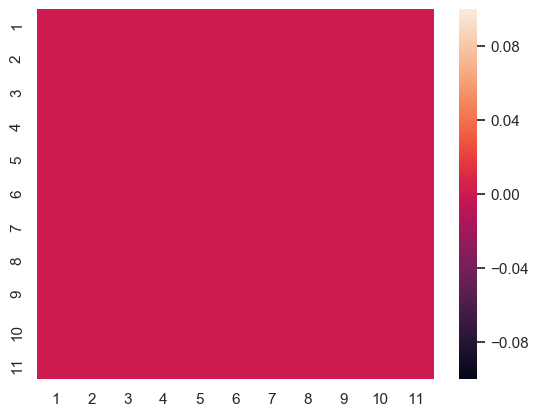

In [266]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()